In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [3]:
df= pd.read_csv("forestfires.csv")
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [5]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [6]:
pd.set_option("display.max_columns",31)
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [7]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

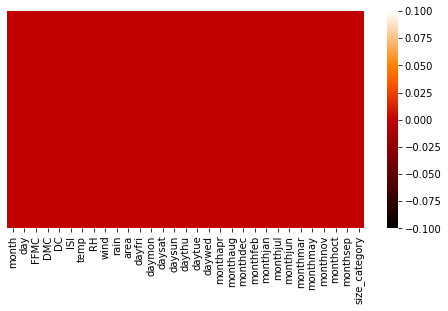

In [8]:
plt.rcParams['figure.figsize']=(8,4)
sns.heatmap(df.isna(), cmap =('gist_heat'), yticklabels=False)

In [9]:
#Target variable
y_count = df.size_category.value_counts().reset_index().rename(columns={'index':'size_category', 'size_category':'counts'})


,size_category,counts
0,small,378
1,large,139


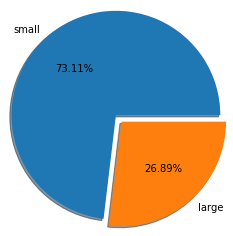

In [10]:
plt.pie(y_count.counts, labels=y_count['size_category'], shadow = True, autopct='%1.2f%%', explode=(0,0.1), radius=1.2)
y_count

In [11]:
#Other features with target variable
month_ff = df.groupby(['size_category', 'month']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
month_ff.head(15) 

,size_category,month,count
11,small,aug,141
21,small,sep,121
9,large,sep,51
1,large,aug,43
17,small,mar,42
15,small,jul,23
16,small,jun,14
13,small,feb,14
6,large,mar,12
20,small,oct,11


In [12]:
day_ff = df.groupby(['size_category', 'day']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
day_ff

,size_category,day,count
10,small,sun,68
7,small,fri,64
9,small,sat,58
8,small,mon,55
11,small,thu,48
12,small,tue,44
13,small,wed,41
3,large,sun,27
2,large,sat,26
0,large,fri,21


Text(0.5, 1.01, 'No of fires on each day')

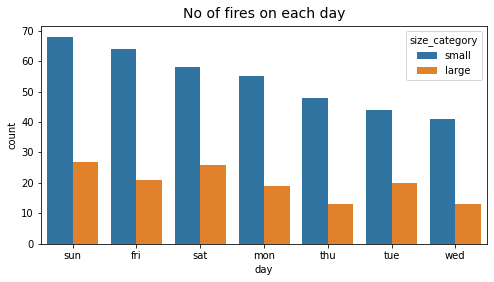

In [13]:
sns.barplot(x='day', y = 'count', hue='size_category', data=day_ff)
plt.title("No of fires on each day", fontsize=14, y=1.01)

In [15]:
pred = df.iloc[:,2:28]
target = df.iloc[:,-1]
pred, target

(     FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  daymon  \
 0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1       0   
 1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0       0   
 2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0       0   
 3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1       0   
 4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0       0   
 ..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...     ...   
 512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0       0   
 513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0       0   
 514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0       0   
 515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0       0   
 516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0       0   
 
      daysat  daysun  daythu  daytue  daywed  mont

In [16]:
#Normalising the data as there is scale difference
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

In [17]:
fires = norm_func(pred)
fires

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Model Validation
x_train,x_test,y_train,y_test = train_test_split(pred,target,test_size = 0.20, stratify = target)

In [19]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((413, 26), (413,), (104, 26), (104,))

In [20]:
#kernal="linear","rbf","polynomial"
clf1=SVC(kernel='poly',gamma=0.001) 

clf1.fit(x_train,y_train)

y_pred = clf1.predict(x_test)

acc = accuracy_score(y_test,y_pred)*100
print("Test Accuracy=",acc)

confusion_matrix(y_test, y_pred)

Test Accuracy= 99.03846153846155


array([[27,  1],
       [ 0, 76]])

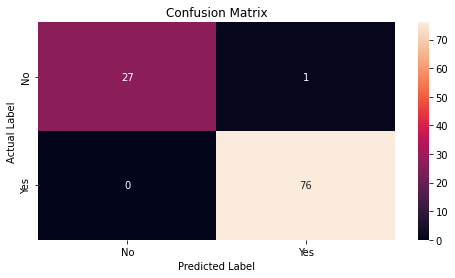

In [21]:
# plot confusion matrix to describe the performance of classifier.
cm_ff=confusion_matrix(y_test, y_pred)
class_label = ["No", "Yes"]
ff_cm = pd.DataFrame(cm_ff, index = class_label, columns = class_label)
sns.heatmap(ff_cm, annot = True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [22]:
# GridSearch CV for best params
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5,1,0.001,0.0001,0.00001],'C':[15,14,13,12,11,10,0.1,0.001] }] # regularization of the parameter
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5, 1, 0.001, 0.0001, 1e-05],
                          'kernel': ['rbf']}])

In [23]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 0.0001, 'kernel': 'rbf'}, 0.9030197444831591)

In [24]:
#kernal=rbf
clf1=SVC(kernel='rbf',gamma=0.0001,C=15) 

clf1.fit(x_train,y_train)

y_pred = clf1.predict(x_test)

acc = accuracy_score(y_test,y_pred)*100
print("Test Accuracy=",acc)

confusion_matrix(y_test, y_pred)

Test Accuracy= 91.34615384615384


array([[23,  5],
       [ 4, 72]])

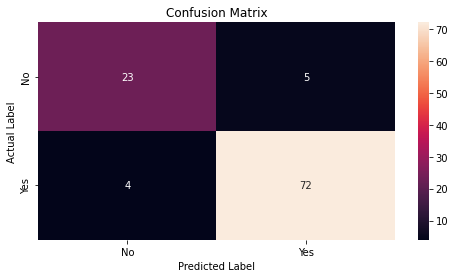

In [25]:
# plot confusion matrix to describe the performance of classifier.
cm_ff=confusion_matrix(y_test, y_pred)
class_label = ["No", "Yes"]
ff_cm = pd.DataFrame(cm_ff, index = class_label, columns = class_label)
sns.heatmap(ff_cm, annot = True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [26]:
clf = SVC()
param_grid = [{'kernel':['poly'],'gamma':[50,5,10,0.5,1,0.001,0.0001,0.00001],'C':[15,14,13,12,11,10,0.1,0.001] }] # regularization of the parameter
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5, 1, 0.001, 0.0001, 1e-05],
                          'kernel': ['poly']}])

In [27]:
gsv.best_params_ , gsv.best_score_ 

({'C': 12, 'gamma': 0.0001, 'kernel': 'poly'}, 0.9733449477351916)

In [28]:
#kernal=poly
clf1=SVC(kernel='poly',gamma=0.0001,C=12) 

clf1.fit(x_train,y_train)

y_pred = clf1.predict(x_test)

acc = accuracy_score(y_test,y_pred)*100
print("Test Accuracy=",acc)

confusion_matrix(y_test, y_pred)

Test Accuracy= 99.03846153846155


array([[27,  1],
       [ 0, 76]])

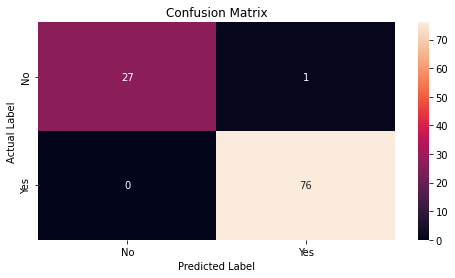

In [29]:
#plot confusion matrix to describe the performance of classifier.
cm_ff=confusion_matrix(y_test, y_pred)
class_label = ["No", "Yes"]
ff_cm = pd.DataFrame(cm_ff, index = class_label, columns = class_label)
sns.heatmap(ff_cm, annot = True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [30]:
clf = SVC()
param_grid = [{'kernel':['linear'],'gamma':[50,5,10,0.5,1,0.001,0.0001,0.00001],'C':[15,14,13,12,11,10,0.1,0.001] }] # regularization of the parameter
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5, 1, 0.001, 0.0001, 1e-05],
                          'kernel': ['linear']}])

In [31]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 50, 'kernel': 'linear'}, 0.9927409988385598)

In [32]:
#kernal=linear
clf1=SVC(kernel='linear',gamma=50,C=15) 

clf1.fit(x_train,y_train)

y_pred = clf1.predict(x_test)

acc = accuracy_score(y_test,y_pred)*100
print("Test Accuracy=",acc)

confusion_matrix(y_test, y_pred)

Test Accuracy= 98.07692307692307


array([[27,  1],
       [ 1, 75]])

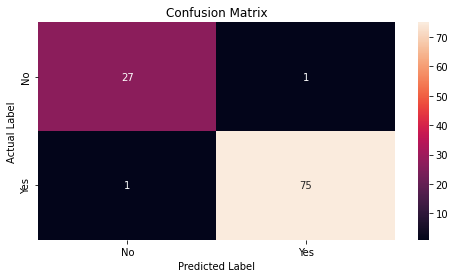

In [33]:
#plot confusion matrix to describe the performance of classifier.
cm_ff=confusion_matrix(y_test, y_pred)
class_label = ["No", "Yes"]
ff_cm = pd.DataFrame(cm_ff, index = class_label, columns = class_label)
sns.heatmap(ff_cm, annot = True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Based on our calculations kernel:polynomial model is more accurate.